In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [2]:
df_Fallout = pd.read_csv('./data/r_Fallout.csv')
df_GTA = pd.read_csv('./data/r_GrandTheftAutoV.csv')

## Initial Data Cleaning

In [3]:
# Drop duplicates and null values
df_Fallout = df_Fallout.drop_duplicates()
df_Fallout = df_Fallout.dropna()
df_GTA = df_GTA.drop_duplicates()
df_GTA = df_GTA.dropna()

# Drop posts that were removed from original webscrape
filter1 = df_Fallout['selftext']=='[removed]'
filter2 = df_GTA['selftext']=='[removed]'

df_Fallout = df_Fallout.drop(df_Fallout[filter1].index, axis=0)
df_GTA = df_GTA.drop(df_GTA[filter2].index, axis=0)

In [4]:
# Clear miscellaneous characters
df_Fallout['selftext'] = df_Fallout['selftext'].str.replace('\n', '')
df_GTA['selftext'] = df_GTA['selftext'].str.replace('\n', '')

In [5]:
df_GTA

,created_utc,author,selftext,title,subreddit
0,1615996307,Chchbitcheetah,I have a PS4 and looking to find another girl ...,Someone play GTA,GrandTheftAutoV
1,1615994614,MidoriTea,"I know you can do the 50 stunt jumps online, b...",Under the Bridge online?,GrandTheftAutoV
3,1615992134,Litla_Tikin,Could this be because of the update? and is th...,The game is lagging so much all of a sudden...,GrandTheftAutoV
4,1615990906,DivineCheeta,"Hi, im experiencing a bug possibly in Gta Onli...",Treasure hunt issues.,GrandTheftAutoV
7,1615983907,kn00perss,"Hey, is there someone with the same problem as...",Can't run GTA V,GrandTheftAutoV
...,...,...,...,...,...
19992,1576431397,Drewparker69,Does anyone have the gunman unlocked that had ...,Diamond heists gunman locked?,GrandTheftAutoV
19993,1576427982,Litto10,Can someone help me? I have this problem: ever...,Help,GrandTheftAutoV
19996,1576425576,OFF-WH1TE,**PC AND PS4 GTA CARMEETS | HYPE CAR CLUB**📷In...,GTA V CARMEETS,GrandTheftAutoV
19997,1576423854,fox_score,For some reason all my vehicles will go from t...,Cars not leaving second gear,GrandTheftAutoV


In [6]:
df_Fallout

,created_utc,author,selftext,title,subreddit
0,1615945779,40classicsfeatJim,I know of the save data issue (as I ran into i...,Is it worth playing New Vegas on PS3?,Fallout
1,1615945739,Caesar-legion,I have heard time and time again that when lan...,Is legate lanius a good leader,Fallout
2,1615945502,politicaly_incorect,Ok hear me out here as i list all the simalari...,Anyone else notice that 2021 looks alot like l...,Fallout
3,1615945411,Mr_Tubberz,So I’m messing around with mods and all of a s...,Can’t reload gun!,Fallout
5,1615945005,Mattlew0YT,"Ok! The war f#cked up US and China, but what a...",What happened with the rest of the world?,Fallout
...,...,...,...,...,...
19994,1596847803,DoctorDanDungus,https://www.youtube.com/watch?v=JJO_tmiwdPE&am...,"Last week I published Part 1 of a fun ""miniser...",Fallout
19995,1596847708,dave41468,"I know there is a way to disable blood, but ho...",Fallout 4 settings,Fallout
19996,1596847509,pravhoven,Some settlements are right next to big sources...,[FO4] Water so close yet so far.,Fallout
19997,1596846928,haha365,"If possible, please give reasons. I always wa...",Is the Ambush Kit worth it?,Fallout


In [7]:
# Combine data from both datasets
df = pd.concat([df_Fallout, df_GTA], axis =0 )

In [8]:
# Rename column headers
df.columns = ['timestamp', 'author', 'post_text', 'post_title', 'category']

In [9]:
df

,timestamp,author,post_text,post_title,category
0,1615945779,40classicsfeatJim,I know of the save data issue (as I ran into i...,Is it worth playing New Vegas on PS3?,Fallout
1,1615945739,Caesar-legion,I have heard time and time again that when lan...,Is legate lanius a good leader,Fallout
2,1615945502,politicaly_incorect,Ok hear me out here as i list all the simalari...,Anyone else notice that 2021 looks alot like l...,Fallout
3,1615945411,Mr_Tubberz,So I’m messing around with mods and all of a s...,Can’t reload gun!,Fallout
5,1615945005,Mattlew0YT,"Ok! The war f#cked up US and China, but what a...",What happened with the rest of the world?,Fallout
...,...,...,...,...,...
19992,1576431397,Drewparker69,Does anyone have the gunman unlocked that had ...,Diamond heists gunman locked?,GrandTheftAutoV
19993,1576427982,Litto10,Can someone help me? I have this problem: ever...,Help,GrandTheftAutoV
19996,1576425576,OFF-WH1TE,**PC AND PS4 GTA CARMEETS | HYPE CAR CLUB**📷In...,GTA V CARMEETS,GrandTheftAutoV
19997,1576423854,fox_score,For some reason all my vehicles will go from t...,Cars not leaving second gear,GrandTheftAutoV


In [10]:
df['word_count'] = [len(status.split(' ')) for status in df['post_text']]

In [11]:
df.groupby(by='category')[['word_count']].mean()

,word_count
category,
Fallout,99.584498
GrandTheftAutoV,59.012168


In [12]:
# Map subreddit categories to 0/1 binary variables
df['category'] = df['category'].map({'Fallout': 0, 'GrandTheftAutoV': 1})

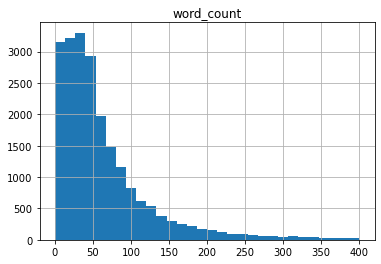

In [13]:
df.hist('word_count', bins=30, range=(0, 400));

## Text Pre-processing

In [14]:
X = df['post_text']
y = df['category']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [16]:
pipe = Pipeline([
    ('cvec' , CountVectorizer()),
    ('nb' , MultinomialNB())
])

In [17]:
params = {
    'cvec__max_features' : [10_000, 12_000, 14_000],
    'cvec__min_df' : [4, 5],
    'cvec__max_df' : [0.70, 0.80],
}

In [18]:
gs = GridSearchCV(estimator = pipe, param_grid=params, cv=5, verbose=1)

In [19]:
%time gs.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   53.4s finished


CPU times: user 53.6 s, sys: 694 ms, total: 54.3 s
Wall time: 54.3 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'cvec__max_df': [0.7, 0.8],
                         'cvec__max_features': [10000, 12000, 14000],
                         'cvec__min_df': [4, 5]},
             verbose=1)

In [20]:
gs.best_score_

0.8934547453205987

In [21]:
gs.best_params_

{'cvec__max_df': 0.7, 'cvec__max_features': 10000, 'cvec__min_df': 4}

In [22]:
gs.score(X_test, y_test)

0.8921319796954315

In [23]:
cvec_prod = CountVectorizer(max_features=14_000, max_df=.7, min_df=4, stop_words='english')
X_train = cvec_prod.fit_transform(X_train)
train_text_vector = pd.DataFrame(X_train.todense(), columns=cvec_prod.get_feature_names())

In [24]:
X_test = cvec_prod.transform(X_test)
test_text_vector = pd.DataFrame(X_test.todense(), columns=cvec_prod.get_feature_names())

In [25]:
train_text_vector.sum().sort_values(ascending=False).head(20)

game       8896
fallout    8187
just       7226
like       6094
new        4494
know       3872
ve         3613
https      3050
play       2941
don        2918
time       2905
want       2471
gta        2459
really     2399
got        2344
help       2328
people     2288
amp        2285
com        2261
make       2199
dtype: int64

## Multinomial Naive Bayes Model

In [26]:
nb = MultinomialNB()

In [27]:
nb.fit(X_train, y_train)

MultinomialNB()

In [28]:
nb.score(X_train, y_train)

0.914848613041639

In [29]:
nb.score(X_test, y_test)

0.9053662073966643

In [30]:
pred = nb.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

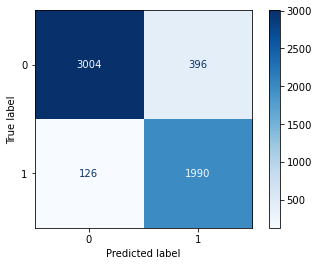

In [31]:
plot_confusion_matrix(nb, X_test, y_test, cmap='Blues', values_format='d');

## Random Forest Model

In [32]:
rf = RandomForestClassifier(n_jobs=6)

params = {
    'n_estimators' : [50, 75, 100],
    'max_depth' : [50, 100, 150],
    'min_samples_leaf' : [15, 20, 25]
}

gs_rf = GridSearchCV(rf, param_grid=params, cv=5)

%time gs_rf.fit(X_train, y_train)

CPU times: user 23.8 s, sys: 3.62 s, total: 27.5 s
Wall time: 50.1 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=6),
             param_grid={'max_depth': [50, 100, 150],
                         'min_samples_leaf': [15, 20, 25],
                         'n_estimators': [50, 75, 100]})

In [33]:
gs_rf.best_score_

0.8860819024193836

In [34]:
gs_rf.best_params_

{'max_depth': 100, 'min_samples_leaf': 15, 'n_estimators': 100}

In [35]:
rf = RandomForestClassifier(n_estimators=100, max_depth=100, min_samples_leaf=15)

In [36]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=15)

In [37]:
rf.score(X_train, y_train)

0.8965371366410829

In [38]:
rf.score(X_test, y_test)

0.8977519941986947

In [39]:
pred = rf.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

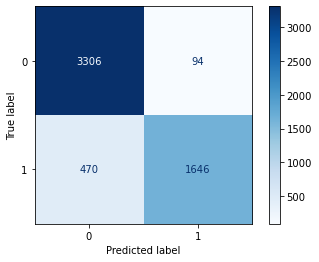

In [40]:
plot_confusion_matrix(rf, X_test, y_test, cmap='Blues', values_format='d');

In [41]:
#Baseline model
y_test.value_counts(normalize=True)

0    0.616389
1    0.383611
Name: category, dtype: float64

In [42]:
sensitivity = tp / (tp + fn)
sensitivity

0.777882797731569

In [43]:
specificity = fp / (fp + tn)
specificity

0.027647058823529413

## Logistic Regression

In [44]:
lg = LogisticRegression(solver='liblinear', max_iter=500)

In [45]:
lg.fit(X_train, y_train)

LogisticRegression(max_iter=500, solver='liblinear')

In [46]:
lg.score(X_train, y_train)

0.9703873813984408

In [47]:
lg.score(X_test, y_test)

0.9247643219724438

In [48]:
pred = rf.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

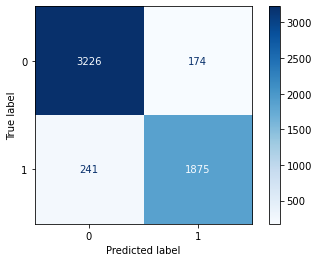

In [49]:
plot_confusion_matrix(lg, X_test, y_test, cmap='Blues', values_format='d');